# Clase 10: Inferencia Estadística VI
Para abrirlo con colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase10_InferenciaEstadisticaVI.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# ANOVA 2

In [ ]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q
!pip install pingouin -q # statistical analysis

## Caso de Estudio: InsectSprays


In [3]:
import rdatasets # utilizamos este paquete para obtener datos desde R

dataset_spray = rdatasets.data('InsectSprays')

In [4]:
dataset_spray['spray'].value_counts() # nos permite identificar la cantidad de datos por grupo

spray
A    12
B    12
C    12
D    12
E    12
F    12
Name: count, dtype: int64

p-values de test de Normalidad (Shapiro-Wilk)
Spray A: st.shapiro(Spray_A).pvalue = 0.7487
Spray B: st.shapiro(Spray_A).pvalue = 0.6415
Spray C: st.shapiro(Spray_A).pvalue = 0.0476
Spray D: st.shapiro(Spray_A).pvalue = 0.0027
Spray E: st.shapiro(Spray_A).pvalue = 0.2967
Spray F: st.shapiro(Spray_A).pvalue = 0.1009
p-values de test de Homocedasticidad (Levene)
p-value: st.levene(Spray_A, Spray_B, Spray_C, Spray_D, Spray_E, Spray_F).pvalue = 0.0042


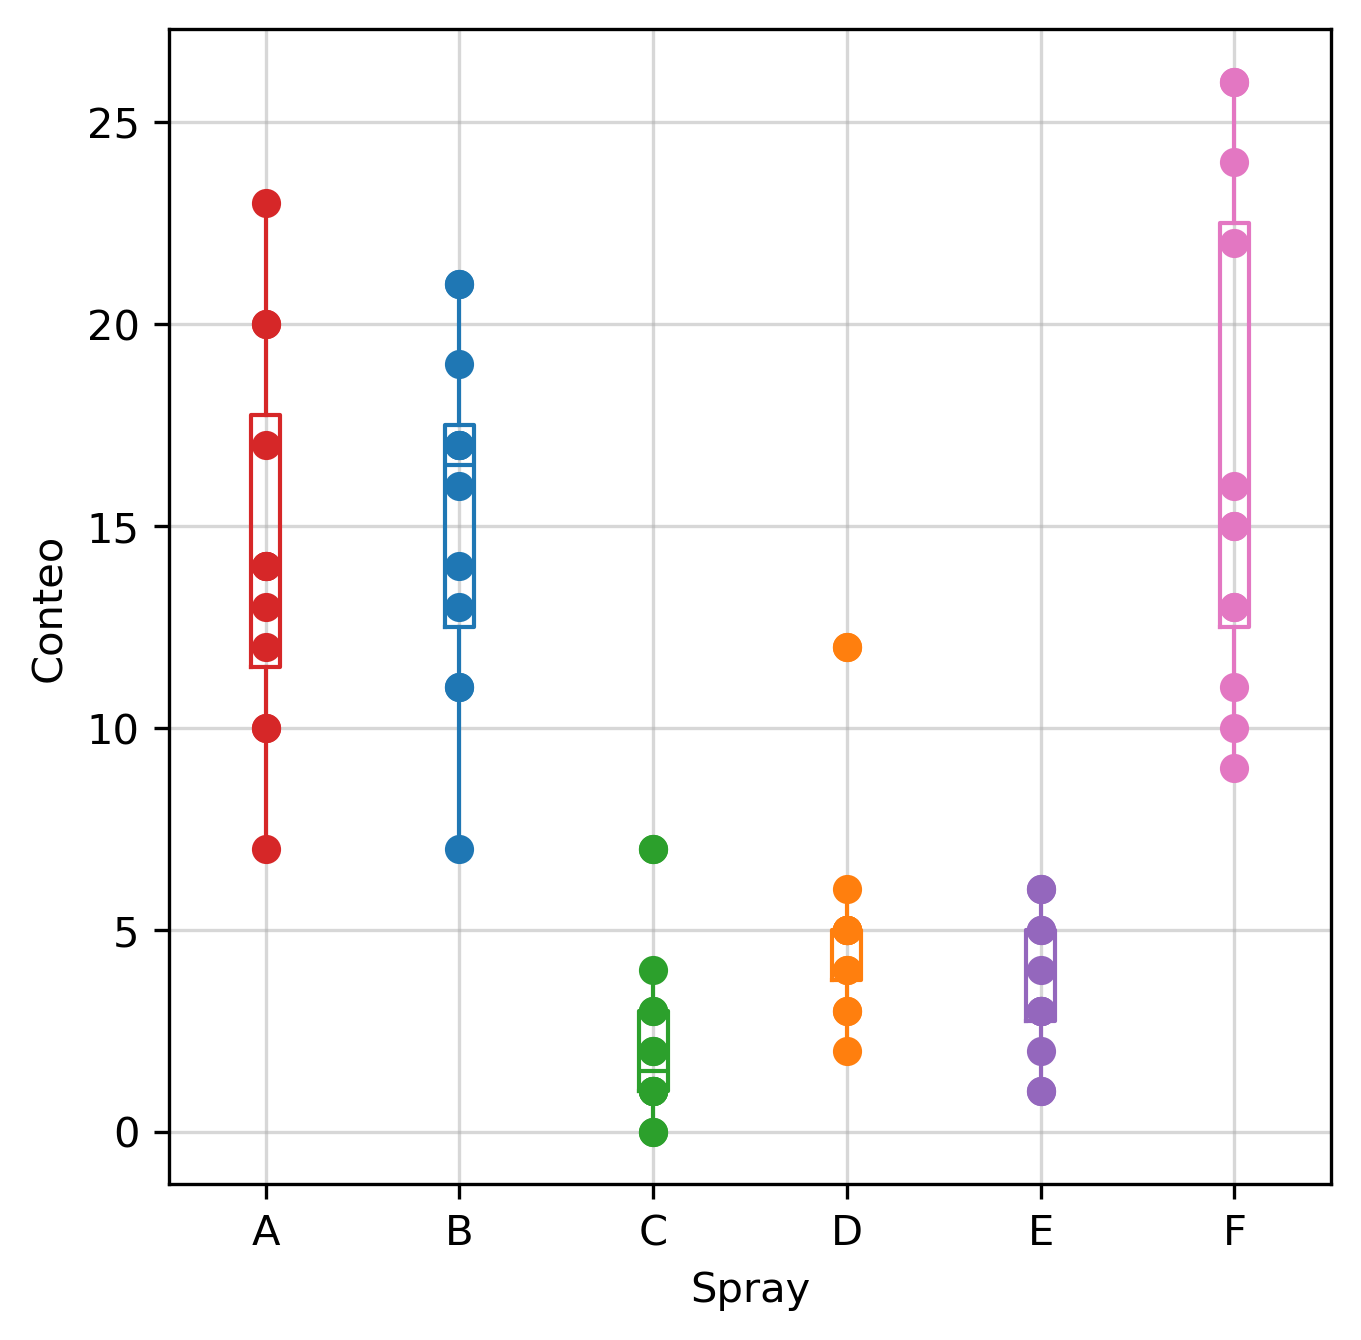

In [5]:
import scipy.stats as st
import matplotlib.pyplot as plt
Spray_A = dataset_spray.loc[dataset_spray['spray'] == 'A']['count']
Spray_B = dataset_spray.loc[dataset_spray['spray'] == 'B']['count']
Spray_C = dataset_spray.loc[dataset_spray['spray'] == 'C']['count']
Spray_D = dataset_spray.loc[dataset_spray['spray'] == 'D']['count']
Spray_E = dataset_spray.loc[dataset_spray['spray'] == 'E']['count']
Spray_F = dataset_spray.loc[dataset_spray['spray'] == 'F']['count']

# Test de Levene para homoscedasticidad
print("p-values de test de Normalidad (Shapiro-Wilk)")
print(f'Spray A: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_A).pvalue:.4f}')
print(f'Spray B: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_B).pvalue:.4f}')
print(f'Spray C: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_C).pvalue:.4f}')
print(f'Spray D: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_D).pvalue:.4f}')
print(f'Spray E: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_E).pvalue:.4f}')
print(f'Spray F: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_F).pvalue:.4f}')
print("p-values de test de Homocedasticidad (Levene)")

levene = st.levene(Spray_A, Spray_B, Spray_C, Spray_D, Spray_E, Spray_F)
print(f'p-value: st.levene(Spray_A, Spray_B, Spray_C, Spray_D, Spray_E, Spray_F).pvalue = {levene.pvalue:.4f}')

# Analisis exploratorio
fig, ax = plt.subplots(figsize = (5,5), dpi = 300)
ax.boxplot(Spray_A, positions = [1], tick_labels = ['A'],
           boxprops=dict(color="tab:red"),
           medianprops=dict(color="tab:red"),
           capprops=dict(color="tab:red"),
           whiskerprops=dict(color="tab:red"),
           flierprops=dict(color="tab:red", markeredgecolor="tab:red"),
           zorder = 3
           )
ax.scatter([1]*len(Spray_A), Spray_A, color = 'tab:red', zorder = 3)
ax.boxplot(Spray_B, positions = [2], tick_labels = ['B'],
           boxprops=dict(color="tab:blue"),
           medianprops=dict(color="tab:blue"),
           capprops=dict(color="tab:blue"),
           whiskerprops=dict(color="tab:blue"),
           flierprops=dict(color="tab:blue", markeredgecolor="tab:blue"),
           zorder = 3)
ax.scatter([2]*len(Spray_B), Spray_B, color = 'tab:blue', zorder = 3)
ax.boxplot(Spray_C, positions = [3], tick_labels = ['C'],
           boxprops=dict(color="tab:green"),
           medianprops=dict(color="tab:green"),
           capprops=dict(color="tab:green"),
           whiskerprops=dict(color="tab:green"),
           flierprops=dict(color="tab:green", markeredgecolor="tab:green"),
           zorder = 3)
ax.scatter([3]*len(Spray_C), Spray_C, color = 'tab:green', zorder = 3)

ax.boxplot(Spray_D, positions = [4], tick_labels = ['D'],
           boxprops=dict(color="tab:orange"),
           medianprops=dict(color="tab:orange"),
           capprops=dict(color="tab:orange"),
           whiskerprops=dict(color="tab:orange"),
           flierprops=dict(color="tab:orange", markeredgecolor="tab:orange"),
           zorder = 3)
ax.scatter([4]*len(Spray_D), Spray_D, color = 'tab:orange', zorder = 3)

ax.boxplot(Spray_E, positions = [5], tick_labels = ['E'],
           boxprops=dict(color="tab:purple"),
           medianprops=dict(color="tab:purple"),
           capprops=dict(color="tab:purple"),
           whiskerprops=dict(color="tab:purple"),
           flierprops=dict(color="tab:purple", markeredgecolor="tab:purple"),
           zorder = 3)
ax.scatter([5]*len(Spray_E), Spray_E, color = 'tab:purple', zorder = 3)

ax.boxplot(Spray_F, positions = [6], tick_labels = ['F'],
           boxprops=dict(color="tab:pink"),
           medianprops=dict(color="tab:pink"),
           capprops=dict(color="tab:pink"),
           whiskerprops=dict(color="tab:pink"),
           flierprops=dict(color="tab:pink", markeredgecolor="tab:pink"),
           zorder = 3)

ax.scatter([6]*len(Spray_F), Spray_F, color = 'tab:pink', zorder = 3)

ax.grid(alpha = 0.5, zorder = 1)
ax.set_ylabel('Conteo')
ax.set_xlabel('Spray')
plt.show()

## Análisis Post-hoc

Este tipo de análisis permite determinar cual de los grupos es aquel identificado por el Test ANOVA como el diferente por medio de t-test en pares.

Empezamos realizando el test ANOVA

In [13]:
# Comparación utilizando la prueba ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
ols_spray = ols('count ~ C(spray)', data = dataset_spray).fit()
sm.stats.anova_lm(ols_spray, typ=2)

,sum_sq,df,F,PR(>F)
C(spray),2668.833333,5.0,34.702282,3.182584e-17
Residual,1015.166667,66.0,NaN,NaN


In [18]:
dataset_spray

,rownames,count,spray
0,1,10,A
1,2,7,A
2,3,20,A
3,4,14,A
4,5,14,A
...,...,...,...
67,68,10,F
68,69,26,F
69,70,26,F
70,71,24,F


In [ ]:
import pingouin as pg
import pandas as pd
## Test t en pares

t_test_pares = pg.pairwise_tests(dv = 'count', # variable dependiente
                                between = 'spray',  # variable independiente
                                data = dataset_spray, # dataframe
                                padjust = 'bonferroni', # ajuste de p-valor
                                parametric = True, # test paramétrico
                                correction = True, # ajuste t por varianza desigual
                                alternative = 'greater'
                                )

# O
# Test t en pares
data2 = pd.DataFrame(
    {'A': Spray_A,
     'B': Spray_B,
     'C': Spray_C,
     'D': Spray_D,
     'E': Spray_E,
     'F': Spray_F}
)
t_test2 = pg.ptests(data2,
                    alternative='greater',)



In [41]:
t_test_pares

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,spray,A,B,False,True,-0.453524,21.784431,greater,6.726716e-01,1.000000e+00,bonferroni,0.805,-0.178766
1,spray,A,C,False,True,8.407339,14.739012,greater,2.639238e-07,3.958857e-06,bonferroni,6.224e+05,3.313927
2,spray,A,D,False,True,6.214359,16.734676,greater,5.060456e-06,7.590684e-05,bonferroni,8577.622,2.449519
3,spray,A,E,False,True,7.579791,13.910462,greater,1.327274e-06,1.990911e-05,bonferroni,1.301e+05,2.987732
4,spray,A,F,False,True,-0.961944,20.522752,greater,8.263621e-01,1.000000e+00,bonferroni,0.958,-0.379170
5,spray,B,C,False,True,9.753917,15.499347,greater,2.585264e-08,3.877896e-07,bonferroni,6.84e+06,3.844709
6,spray,B,D,False,True,7.289021,17.758484,greater,4.871963e-07,7.307945e-06,bonferroni,7.389e+04,2.873119
7,spray,B,E,False,True,8.893970,14.522672,greater,1.470154e-07,2.205231e-06,bonferroni,1.512e+06,3.505743
8,spray,B,F,False,True,-0.612590,19.498124,greater,7.263868e-01,1.000000e+00,bonferroni,0.856,-0.241465
9,spray,C,D,False,True,-3.078215,20.871854,greater,9.971351e-01,1.000000e+00,bonferroni,0.062,-1.213342


In [40]:
t_test2

,A,B,C,D,E,F
A,-,,***,***,***,
B,-0.454,-,***,***,***,
C,8.407,9.754,-,,,
D,6.214,7.289,-3.078,-,,
E,7.58,8.894,-1.868,1.612,-,
F,-0.962,-0.613,-7.748,-6.076,-7.071,-


In [43]:
## Tukey HSD
tukey = pg.pairwise_tukey(data = dataset_spray, dv = 'count', between = 'spray')
tukey

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,14.500000,15.333333,-0.833333,1.60111,-0.520472,9.951810e-01,-0.178766
1,A,C,14.500000,2.083333,12.416667,1.60111,7.755038,1.083732e-09,3.313927
2,A,D,14.500000,4.916667,9.583333,1.60111,5.985432,1.442022e-06,2.449519
3,A,E,14.500000,3.500000,11.000000,1.60111,6.870235,4.087108e-08,2.987732
4,A,F,14.500000,16.666667,-2.166667,1.60111,-1.353228,7.542147e-01,-0.379170
5,B,C,15.333333,2.083333,13.250000,1.60111,8.275511,1.271354e-10,3.844709
6,B,D,15.333333,4.916667,10.416667,1.60111,6.505905,1.793998e-07,2.873119
7,B,E,15.333333,3.500000,11.833333,1.60111,7.390708,4.850964e-09,3.505743
8,B,F,15.333333,16.666667,-1.333333,1.60111,-0.832756,9.603075e-01,-0.241465
9,C,D,2.083333,4.916667,-2.833333,1.60111,-1.769606,4.920707e-01,-1.213342


# Inferencia de Datos Categóricos

<ipython-input-92-5724b4b6d048>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(ax[i].get_yticks().round(2), fontsize = 14)
<ipython-input-92-5724b4b6d048>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(ax[i].get_yticks().round(2), fontsize = 14)
<ipython-input-92-5724b4b6d048>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels(ax[i].get_yticks().round(2), fontsize = 14)


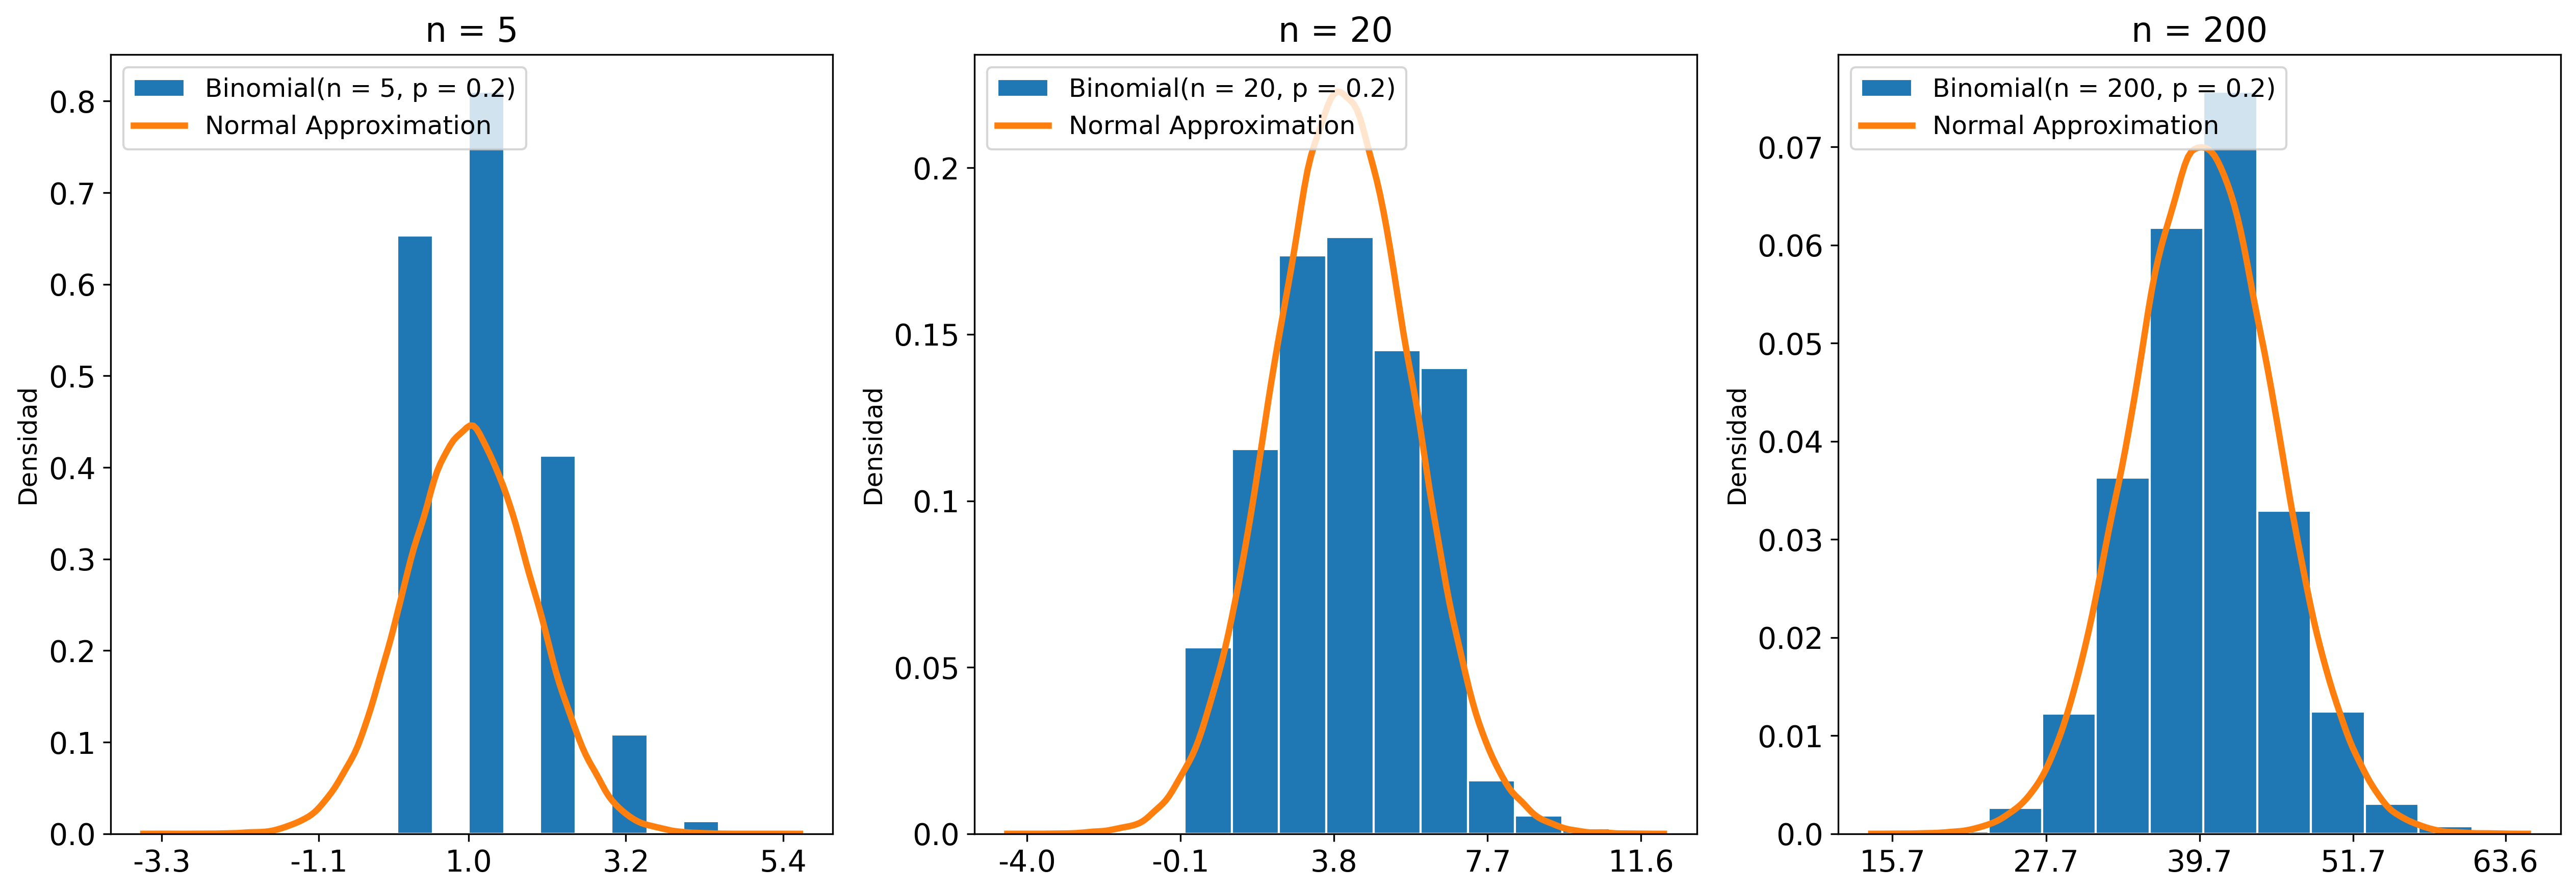

In [92]:
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(1,3, dpi = 300, figsize = (17,6))
p = 0.2
for i, n in enumerate([5, 20 , 200]):
    rand_binom = st.binom.rvs(n = n, p = p, size = 10_000)
    std = np.sqrt(n * p * (1-p))
    mean = n * p
    norm_binom = st.norm.rvs(loc = mean, scale = std, size = 100_000)
    dens, bins, patches = ax[i].hist(
        rand_binom,
        density = True,
        label = f'Binomial(n = {n}, p = {p})',
        edgecolor = 'white'
    )
    sns.kdeplot(norm_binom, ax = ax[i], linewidth = 3, label = 'Normal Approximation')
    ax[i].legend(loc = 'upper left')
    ax[i].set_title(f'n = {n}', fontsize = 16)
    ax[i].set_xticks(np.linspace(min(norm_binom), max(norm_binom), 5).astype(float).round(1))
    ax[i].set_xticklabels(ax[i].get_xticks(), fontsize = 14)

    ax[i].set_yticklabels(ax[i].get_yticks().round(2), fontsize = 14)
    ax[i].set_ylabel('Densidad')
fig.tight_layout()
plt.show()

# Caso de Estudio: Hierba de San Juan

In [106]:
n1 = 100
n2 = 100
pos1 = 27
pos2 = 19
p1 = pos1/n1
p2 = pos2/n2
p_hat = (pos1+pos2)/(n1+n2)
Z_0 = (p1 - p2)/(np.sqrt(p_hat * (1-p_hat) * (1/n1 + 1/n2)))
print(f'Z_0 = {Z_0:.3f}')
p_val = 2 * (1 - st.norm.cdf(abs(Z_0)))
print(f'p-value = {p_val:.4f}')

Z_0 = 1.344
p-value = 0.1789


In [104]:
print(2 * (1 - st.norm.cdf(abs(1.344))))

0.17894838690288628


In [113]:
## En python se puede utilizar la siguiente función
from statsmodels.stats.proportion import proportions_chisquare

chi2stat, p_val, table = proportions_chisquare(np.array([27, 19]), np.array([100, 100]))

chi2stat = 1.8069
p-value = 0.1789
